In [5]:
import matplotlib.pyplot as plt
import sql_to_dataframe as std
import rain

periods = [5000, 10000]
feeRatio = 0.0025

df = std.sqlToDataframe(rain.toRelPath("data\\dataframe-cache.csv"), 
    useCache = True)

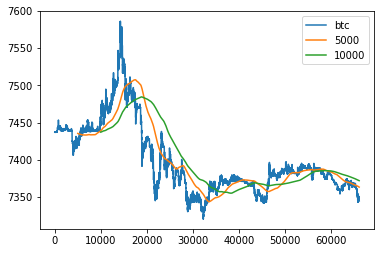

In [6]:
mvAve = [df["mid"].rolling(periods[0]).mean(), 
    df["mid"].rolling(periods[1]).mean()]
plt.plot(df["mid"], label = "btc")
plt.plot(mvAve[0], label = periods[0])
plt.plot(mvAve[1], label = periods[1])
plt.legend()
plt.show()

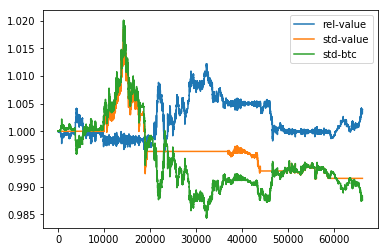

In [7]:
mvDiff = mvAve[1] - mvAve[0]
portfolio = (mvDiff < 0).astype(float)
midShift = df["mid"].shift(-1)
rMid = midShift / df["mid"]
rValue = portfolio * rMid
rValue[rValue == 0] = 1
value = rValue.cumprod() * df.at[0, "mid"]

relValue = value / df["mid"]

plt.plot(relValue, label = "rel-value")
plt.plot(value / value[0], label = "std-value")
plt.plot(df["mid"] / df["mid"][0], label = "std-btc")
plt.legend()
plt.show()

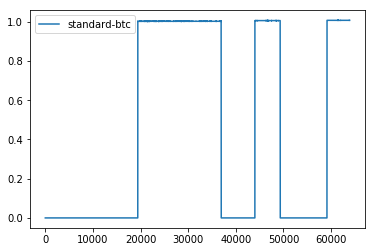

In [4]:
relPort = relValue * portfolio
dRelPort = relPort.shift(-1) - relPort
plt.plot(relPort, label = "standard-btc")
plt.legend()
plt.show()